# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   ## Dataset Description

Dataset yang digunakan adalah **Ames Housing Dataset**, yang berisi informasi detail mengenai karakteristik rumah di Ames, Iowa.

Dataset ini digunakan untuk tugas **regresi**, yaitu memprediksi harga rumah (`SalePrice`) berdasarkan fitur-fitur seperti:
- Kondisi bangunan
- Luas bangunan
- Tahun pembangunan
- Tipe properti
- Lokasi

Dataset telah melalui proses preprocessing sebelumnya (handling missing value dan encoding), sehingga siap digunakan untuk eksperimen machine learning.

link: https://www.kaggle.com/datasets/prevek18/ames-housing-dataset

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
#Type your code here
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
#Type your code here
df = pd.read_csv("/content/AmesHousing.csv")

df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

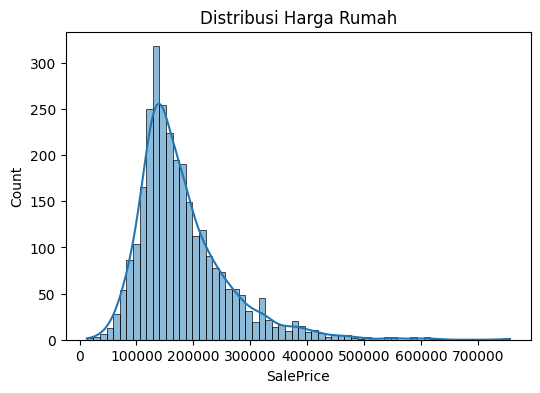

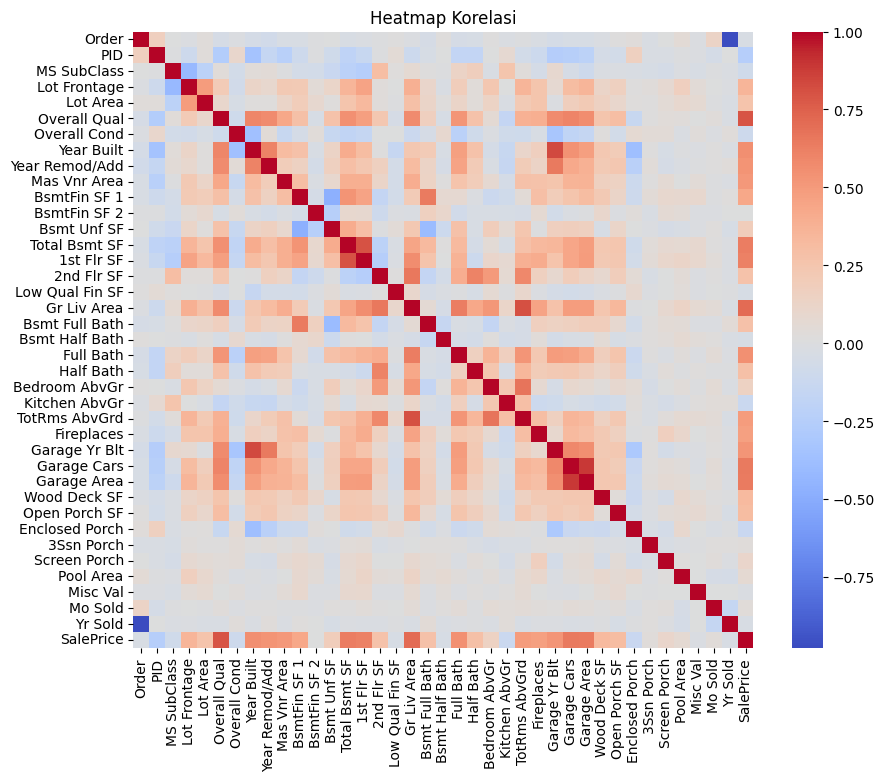

In [3]:
df.shape
df.info()
df.describe()

missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)
print(missing)

plt.figure(figsize=(6,4))
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribusi Harga Rumah")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), cmap="coolwarm")
plt.title("Heatmap Korelasi")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [5]:
print("===== KONDISI AWAL DATA =====")
print("Ukuran data awal:", df.shape)
print("\nMissing values awal:")
display(df.isnull().sum()[df.isnull().sum() > 0])

# Numerik → median
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())
print("\nMissing values numerik setelah imputasi median:")
display(df[num_cols].isnull().sum())

# Kategorikal → modus
cat_cols = df.select_dtypes(include=["object"]).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
print("\nMissing values kategorikal setelah imputasi modus:")
display(df[cat_cols].isnull().sum())

# Duplikat
before_dup = df.shape[0] # Define before_dup
df = df.drop_duplicates()
after_dup = df.shape[0] # Define after_dup
print(f"\nJumlah baris sebelum hapus duplikat: {before_dup}")
print(f"Jumlah baris sesudah hapus duplikat: {after_dup}")

df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()
print("\nUkuran data setelah encoding:", df_encoded.shape)

scaler = StandardScaler()

X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]

X_scaled = scaler.fit_transform(X)
print("\nUkuran fitur sebelum scaling:", X.shape)
print("Ukuran fitur setelah scaling:", X_scaled.shape)

processed_df = pd.DataFrame(X_scaled, columns=X.columns)
processed_df["SalePrice"] = y.values
print("\nPreview dataset hasil preprocessing:")

display(processed_df.head())
print("Ukuran akhir dataset:", processed_df.shape)

processed_df.to_csv("ames_preprocessed.csv", index=False)
print("\nFile 'ames_preprocessed.csv' berhasil disimpan.")

===== KONDISI AWAL DATA =====
Ukuran data awal: (2930, 82)

Missing values awal:


,0



Missing values numerik setelah imputasi median:


,0
Order,0
PID,0
MS SubClass,0
Lot Frontage,0
Lot Area,0
Overall Qual,0
Overall Cond,0
Year Built,0
Year Remod/Add,0
Mas Vnr Area,0



Missing values kategorikal setelah imputasi modus:


,0
MS Zoning,0
Street,0
Alley,0
Lot Shape,0
Land Contour,0
Utilities,0
Lot Config,0
Land Slope,0
Neighborhood,0
Condition 1,0



Jumlah baris sebelum hapus duplikat: 2930
Jumlah baris sesudah hapus duplikat: 2930

Ukuran data setelah encoding: (2930, 263)

Ukuran fitur sebelum scaling: (2930, 262)
Ukuran fitur setelah scaling: (2930, 262)

Preview dataset hasil preprocessing:


,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial,SalePrice
0,-1.731460,-0.997164,-0.877005,3.375742,2.744381,-0.067254,-0.506718,-0.375537,-1.163488,0.061046,...,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072,215000
1,-1.730277,-0.996904,-0.877005,0.514952,0.187097,-0.776079,0.393091,-0.342468,-1.115542,-0.566039,...,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072,105000
2,-1.729095,-0.996899,-0.877005,0.561850,0.522814,-0.067254,0.393091,-0.441674,-1.259380,0.038650,...,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072,172000
3,-1.727913,-0.996888,-0.877005,1.124628,0.128458,0.641571,-0.506718,-0.110988,-0.779919,-0.566039,...,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072,244000
4,-1.726731,-0.992903,0.061285,0.233563,0.467348,-0.776079,-0.506718,0.848000,0.658466,-0.566039,...,-0.298018,-0.048937,-0.018477,0.394161,-0.064128,-0.090878,-0.126294,0.462878,-0.302072,189900


Ukuran akhir dataset: (2930, 263)

File 'ames_preprocessed.csv' berhasil disimpan.
